# Figure 3: Mask Before and After Head Addition

Text(value='', placeholder='Enter path to first .nii.gz file')

Text(value='', placeholder='Enter path to second .nii.gz file')

Button(description='Show Slice', style=ButtonStyle())

Displaying slice 81 with the most nonzero pixels


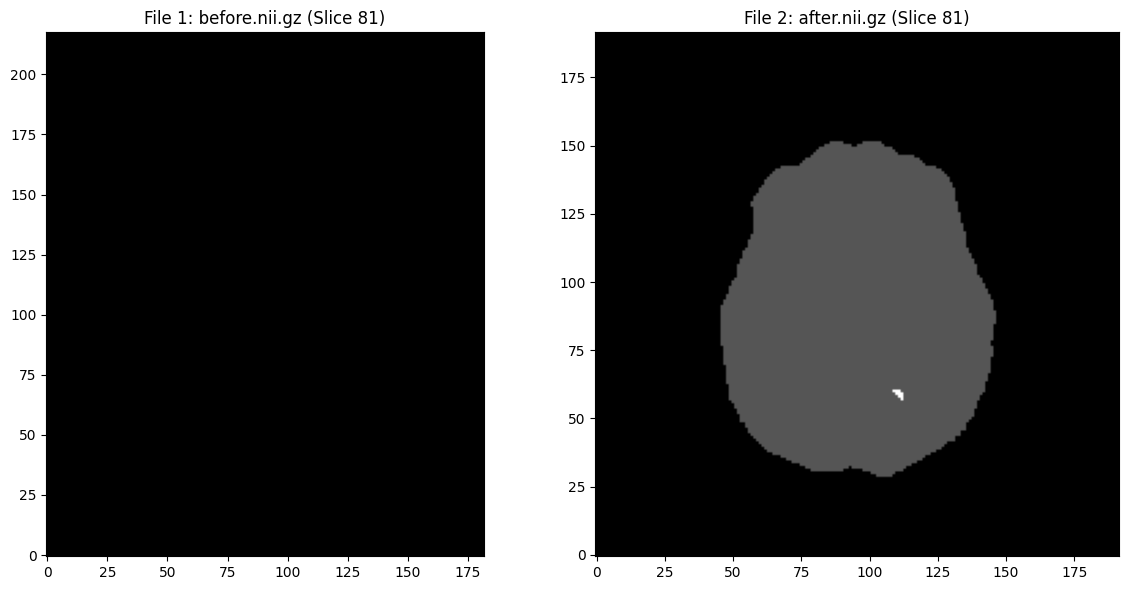

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path
import random

# Function to find a few random slices
def find_random_slices(data1, data2, num_slices=3):
    n_slices = min(data1.shape[2], data2.shape[2])  # Ensure we don't exceed the smallest number of slices
    return random.sample(range(n_slices), num_slices)

# Function to display random slices
def display_slices(file1, file2):
    if not Path(file1).exists() or not Path(file2).exists():
        print("Error: One or both files do not exist.")
        return
    
    # Load images
    img1, img2 = nib.load(file1), nib.load(file2)
    data1, data2 = img1.get_fdata(), img2.get_fdata()

    # Find random slices
    slice_indices = find_random_slices(data1, data2)
    print(f"Displaying slices {slice_indices}")

    # Plot the slices side by side
    fig, axes = plt.subplots(len(slice_indices), 2, figsize=(12, 6 * len(slice_indices)))
    for i, slice_idx in enumerate(slice_indices):
        axes[i, 0].imshow(data1[:, :, slice_idx].T, cmap="gray", origin="lower")
        axes[i, 0].set_title(f"File 1: {Path(file1).name} (Slice {slice_idx})")
        axes[i, 1].imshow(data2[:, :, slice_idx].T, cmap="gray", origin="lower")
        axes[i, 1].set_title(f"File 2: {Path(file2).name} (Slice {slice_idx})")
    plt.tight_layout()
    plt.show()

# File selectors for Jupyter
file1_widget = widgets.Text(placeholder="Enter path to first .nii.gz file")
file2_widget = widgets.Text(placeholder="Enter path to second .nii.gz file")
button = widgets.Button(description="Show Slice")

def on_button_click(b):
    display_slices(file1_widget.value, file2_widget.value)

button.on_click(on_button_click)

display(file1_widget, file2_widget, button)